In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Load and inspect the data

In [2]:
df = pd.read_csv('../dataset/Algerian_forest_fires_cleaned.csv')

In [3]:
df.shape

(243, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


Below is the description for each column:
- day, month, year: Date information.
- Temperature: The temperature in Celsius.
- RH: Relative Humidity in percentage.
- Ws: Wind Speed in km/h.
- Rain: Rain in mm/m².
- FFMC: Fine Fuel Moisture Code index.
- DMC: Duff Moisture Code index.
- DC: Drought Code index.
- ISI: Initial Spread Index.
- BUI: Buildup Index.
- FWI: Fire Weather Index.
- Classes: The class of the fire ('fire' or 'not fire').
- Region: The region of Algeria (0 or 1).

In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
# Check if there's is null vaulues
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [8]:
# Check for duplicates
print('All duplicates:')
print(df.duplicated())

# Filter duplicate rows
print('\nDuplicate rows:')
print(df[df.duplicated()])

All duplicates:
0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240    False
241    False
242    False
Length: 243, dtype: bool

Duplicate rows:
Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []


In [9]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [10]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [11]:
# Remove whitespaces from Classes column
df['Classes'] = df['Classes'].str.strip()

In [12]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

# Exploratory Data Analysis

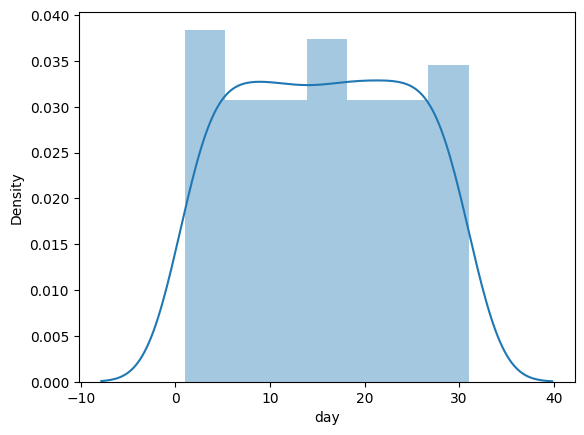

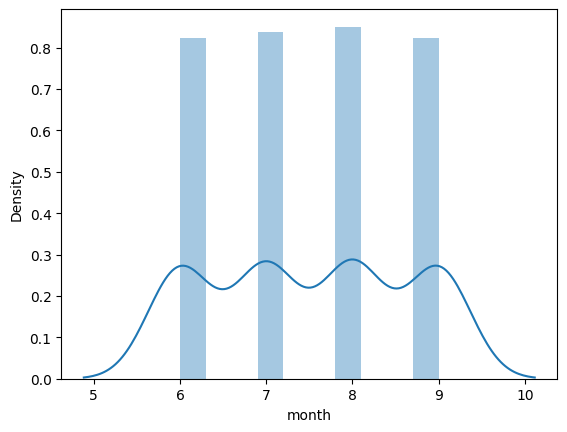

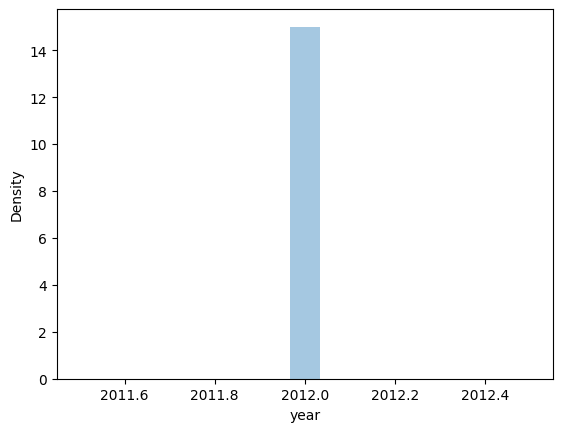

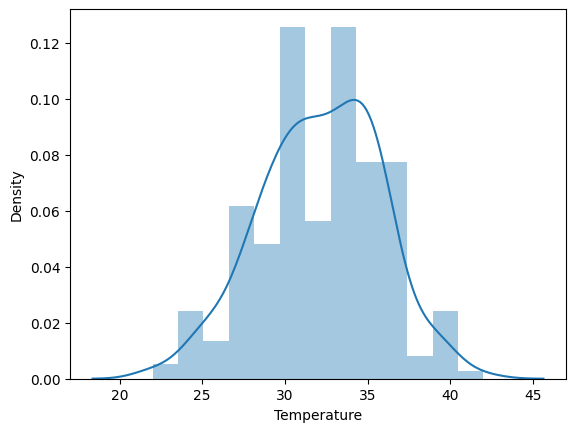

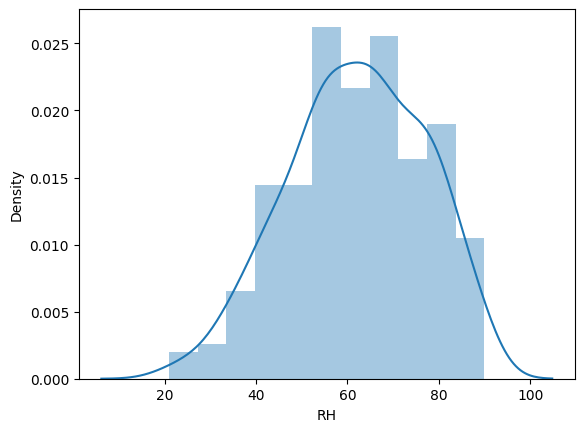

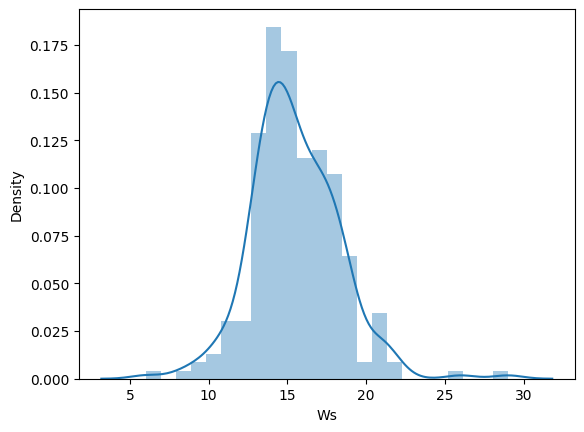

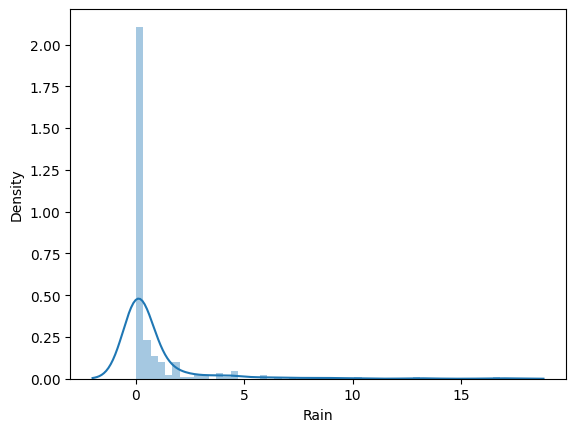

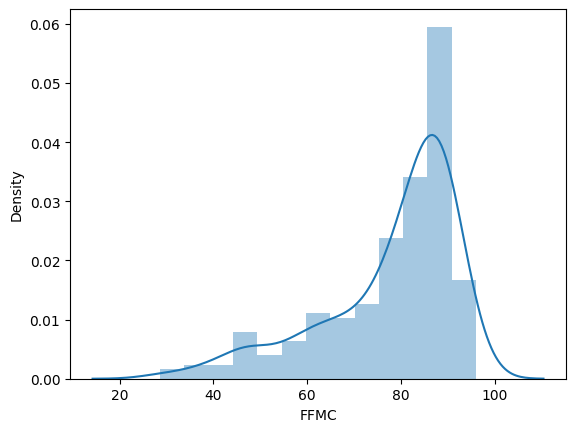

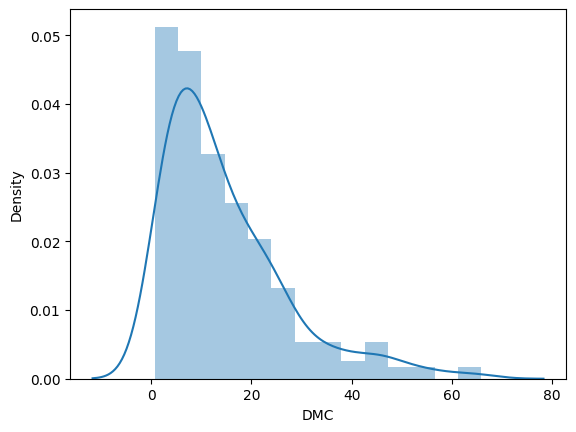

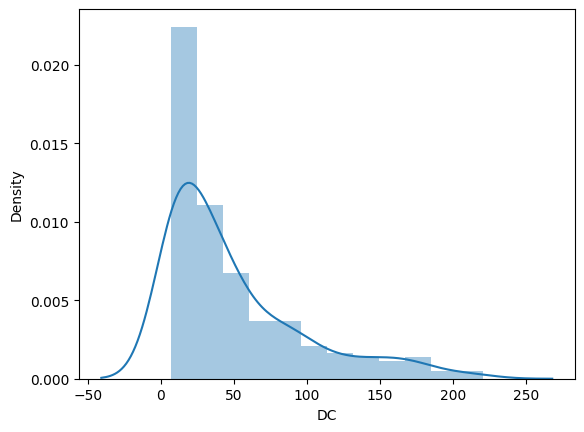

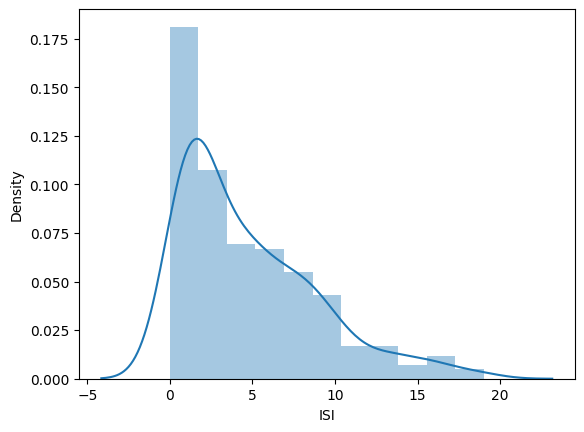

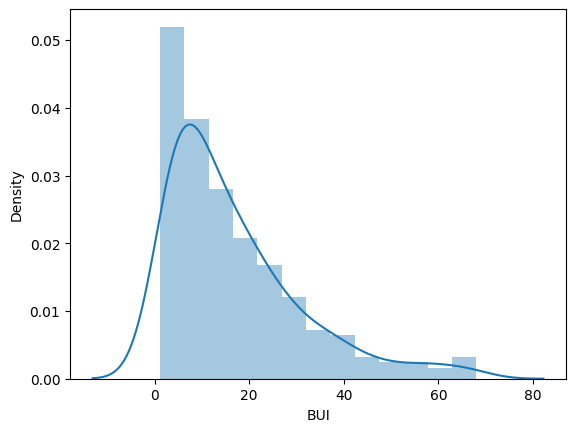

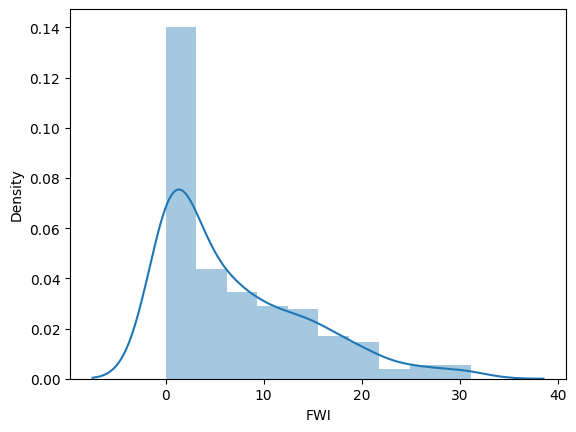

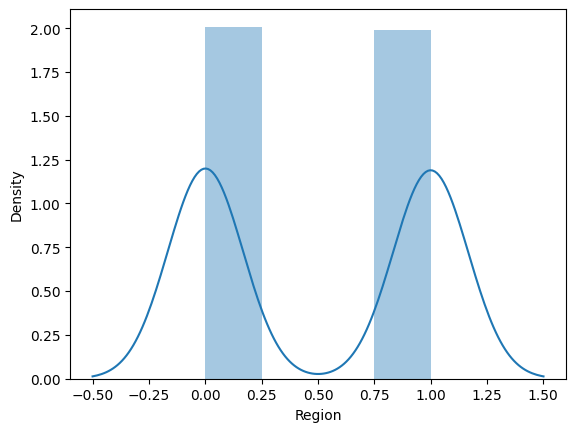

In [13]:
# univariate analysis
for col in df.columns:
    if col != 'Classes':
        sns.distplot(df[col])
        plt.show()

In [14]:
# Encode the target variable
label_encoder = LabelEncoder()
df['Classes'] = label_encoder.fit_transform(df['Classes'])
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


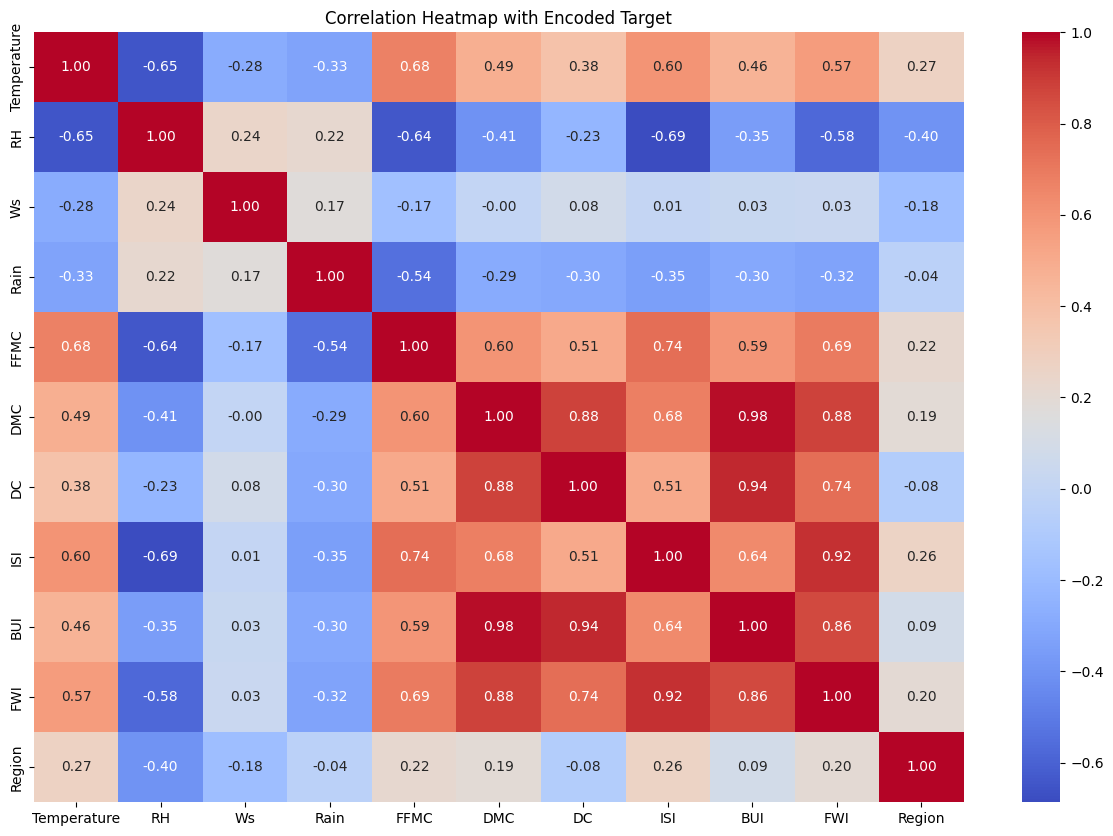

In [15]:
df_without_date = df.drop(columns=['day', 'month', 'year'], axis=1)

# Select only numeric columns, including the encoded target feature
numeric_df = df_without_date.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Encoded Target')
plt.show()

<Axes: ylabel='FWI'>

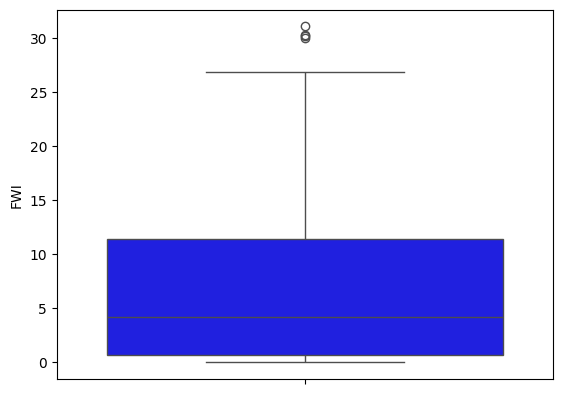

In [16]:
# Box Plots
sns.boxplot(df['FWI'], color='blue')

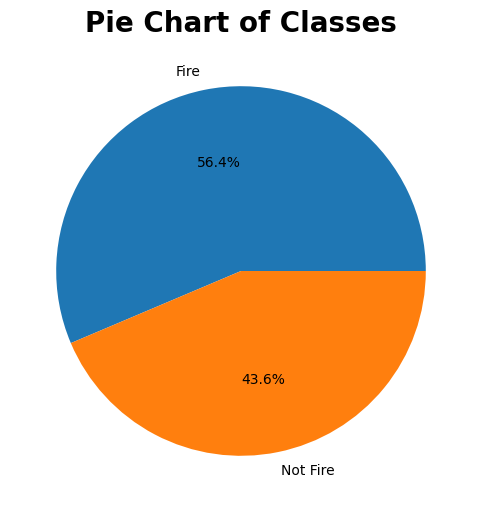

In [17]:
# Chart on how many data results to Fire and Not Fire
percentage=df['Classes'].value_counts(normalize=True)*100

plt.figure(figsize=(13, 6))
plt.pie(percentage,autopct="%1.1f%%",labels=["Fire","Not Fire"])
plt.title("Pie Chart of Classes",weight = "bold",fontsize = 20)
plt.show()

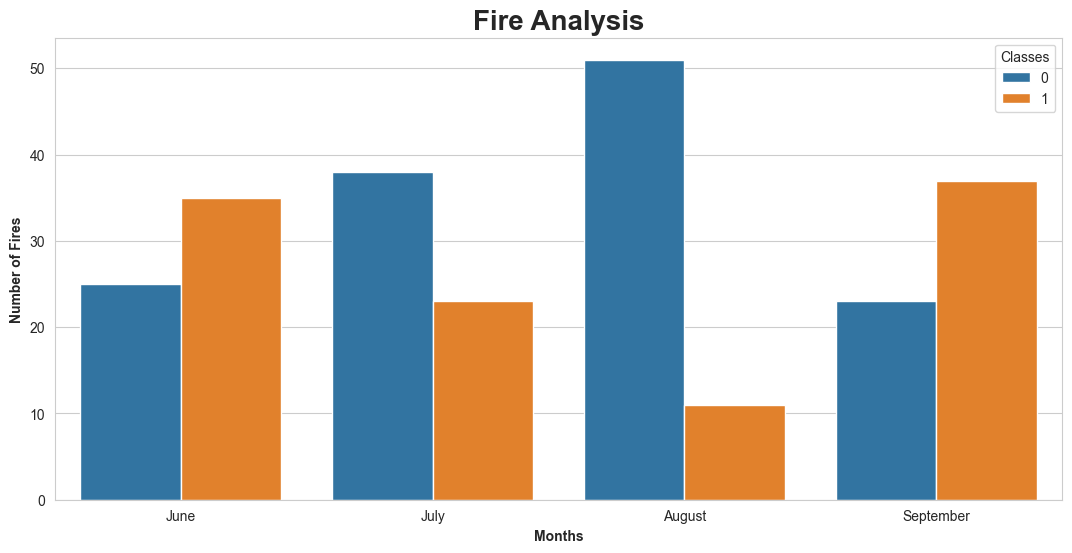

In [18]:
# Graph to show fire on both regions
plt.figure(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes', data = df)
plt.xticks(np.arange(4),['June', 'July', 'August', 'September'])
plt.xlabel('Months', weight = 'bold')
plt.ylabel('Number of Fires', weight = 'bold')
plt.title('Fire Analysis', weight = 'bold', fontsize = 20)
plt.show()

Observation:
- 56.4% of our dataset points to occurrence of fire in Algerian forest
- Notice that August is the month where fire occurs while September is the least one

# Training and Evaluation

In [19]:
# Identify the Inputs and Output features

X = df_without_date.drop(['Classes'], axis=1)
y = df['Classes']

In [20]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [21]:
# split the data into Inputs and a target variable
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 77), (49, 77), (194,), (49,))

Scale the data

In [23]:
# Scale the Data
scaler = StandardScaler()

x_train_sc = scaler.fit_transform(X_train)
x_test_sc = scaler.transform(X_test)

Model training

In [24]:
# Logistic Regression without regularization
no_reg_log_reg = LogisticRegression(penalty='none', random_state=42, max_iter=1000)
no_reg_log_reg.fit(x_train_sc, y_train)
no_reg_predictions = no_reg_log_reg.predict(x_test_sc)
no_reg_probabilities = no_reg_log_reg.predict_proba(x_test_sc)[:, 1]

# Ridge Logistic Regression (L2 regularization)
ridge_log_reg = LogisticRegression(penalty='l2', C=0.1, random_state=42, max_iter=1000)
ridge_log_reg.fit(x_train_sc, y_train)
ridge_predictions = ridge_log_reg.predict(x_test_sc)
ridge_probabilities = ridge_log_reg.predict_proba(x_test_sc)[:, 1]

# Lasso Logistic Regression (L1 regularization)
lasso_log_reg = LogisticRegression(penalty='l1', solver='saga', C=0.1, random_state=42, max_iter=1000)
lasso_log_reg.fit(x_train_sc, y_train)
lasso_predictions = lasso_log_reg.predict(x_test_sc)
lasso_probabilities = lasso_log_reg.predict_proba(x_test_sc)[:, 1]

# ElasticNet Logistic Regression
elastic_net_log_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.1, random_state=42, max_iter=1000)
elastic_net_log_reg.fit(x_train_sc, y_train)
elastic_net_predictions = elastic_net_log_reg.predict(x_test_sc)
elastic_net_probabilities = elastic_net_log_reg.predict_proba(x_test_sc)[:, 1]

Metrics per Model

In [25]:
# Function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, y_prob, model_name):
    print(f"{model_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.10f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.10f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.10f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.10f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.10f}")
    print(f"Log-Loss: {log_loss(y_true, y_prob):.10f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\n")

# Print evaluation metrics for each model
print_evaluation_metrics(y_test, no_reg_predictions, no_reg_probabilities, "Logistic Regression without Regularization")
print_evaluation_metrics(y_test, ridge_predictions, ridge_probabilities, "Ridge Logistic Regression")
print_evaluation_metrics(y_test, lasso_predictions, lasso_probabilities, "Lasso Logistic Regression")
print_evaluation_metrics(y_test, elastic_net_predictions, elastic_net_probabilities, "ElasticNet Logistic Regression")

Logistic Regression without Regularization Evaluation Metrics:
Accuracy: 0.9591836735
Precision: 0.9624489796
Recall: 0.9591836735
F1 Score: 0.9592176871
AUC-ROC: 1.0000000000
Log-Loss: 0.6136269720
Confusion Matrix:
[[24  2]
 [ 0 23]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.92      1.00      0.96        23

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



Ridge Logistic Regression Evaluation Metrics:
Accuracy: 0.9387755102
Precision: 0.9458398744
Recall: 0.9387755102
F1 Score: 0.9387755102
AUC-ROC: 1.0000000000
Log-Loss: 0.1271189850
Confusion Matrix:
[[23  3]
 [ 0 23]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.88      1.00      0.94        23

    

Initial Observation:

After performing the default Logistic Regression, Ridge, Lasso, and ElasticNet, the values across these 4 metrics are relatively close.  Values are the same across these models when C=1.0 but when I changed it to C=0.1 then I can see the difference.  In this scenario, I will pick ElasticNet with the values shown below but take note that Lasso has almost the same values as ElasticNet except the Log-Loss which is a bit higher thus I chose ElasticNet.

Performance Metrics on test data
- Accuracy: 0.9795918367
- Precision: 0.9804421769
- Recall: 0.9795918367
- F1 Score: 0.9796088648
- AUC-ROC: 1.0000000000
- Log-Loss: 0.1658166486


# GridSearch with Cross-Validation

In [26]:
# Function to print evaluation metrics
def print_evaluation_metrics_for_model(y_true, y_pred, y_prob, model_name, model):
    print(f"{model_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    print(f"Log-Loss: {log_loss(y_true, y_prob):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nModel Coefficients:")
    print(model.coef_)
    print("\n")

In [27]:
# Define parameter grid with additional hyperparameters
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization method
    'C': [0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for small or large datasets
    'max_iter': [100, 200],  # Maximum iterations for convergence
    'class_weight': ['balanced', None],  # Handle imbalanced classes
    'fit_intercept': [True, False]  # Include intercept or not
}

In [28]:
# Setup GridSearchCV with expanded parameter grid
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV
grid_search.fit(x_train_sc, y_train)

# Best model parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predict using the best model
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(x_test_sc)
best_probabilities = best_model.predict_proba(x_test_sc)[:, 1]

# Function to print evaluation metrics (as previously defined)
print_evaluation_metrics_for_model(y_test, best_predictions, best_probabilities, "Best Logistic Regression Model from GridSearch", best_model)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters found:  {'C': 10.0, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Model from GridSearch Evaluation Metrics:
Accuracy: 0.9592
Precision: 0.9624
Recall: 0.9592
F1 Score: 0.9592
AUC-ROC: 1.0000
Log-Loss: 0.0619
Confusion Matrix:
[[24  2]
 [ 0 23]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.92      1.00      0.96        23

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49


Model Coefficients:
[[ 0.58718483 -0.05347011  0.46921729  0.38160662 -2.16952509  1.16357754
  -0.68548514 -1.20342424  0.17488368 -0.75998449 -0.06812574  0.58187452
   1.00886107  0.75601375  0.29327292 -1.17042124  0.92773843 -0.5177733
  

Save the model to pickle file


In [29]:
# Save the best model to a pickle file
with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Load the pickle file and test the model

In [30]:
# Load the best model from the pickle file
with open('../models/best_model.pkl', 'rb') as f:
    loaded_best_model = pickle.load(f)

In [31]:
# Predict using the loaded model
loaded_predictions = loaded_best_model.predict(x_test_sc)
loaded_probabilities = loaded_best_model.predict_proba(x_test_sc)[:, 1]

# Print evaluation metrics for the loaded model
print_evaluation_metrics_for_model(y_test, loaded_predictions, loaded_probabilities, "Loaded Logistic Regression Model", loaded_best_model)

# To visualize the grid search results, you can use:
results = pd.DataFrame(grid_search.cv_results_)
print(results)

Loaded Logistic Regression Model Evaluation Metrics:
Accuracy: 0.9592
Precision: 0.9624
Recall: 0.9592
F1 Score: 0.9592
AUC-ROC: 1.0000
Log-Loss: 0.0619
Confusion Matrix:
[[24  2]
 [ 0 23]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.92      1.00      0.96        23

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49


Model Coefficients:
[[ 0.58718483 -0.05347011  0.46921729  0.38160662 -2.16952509  1.16357754
  -0.68548514 -1.20342424  0.17488368 -0.75998449 -0.06812574  0.58187452
   1.00886107  0.75601375  0.29327292 -1.17042124  0.92773843 -0.5177733
  -0.94503554  0.10216565 -0.66237142 -1.14303054  0.33809163  0.57586394
   0.44723867 -2.04447481  1.10347834 -1.26805661 -2.1085159  -0.13118395
  -1.23862154  0.87435493  0.73831012  0.36686235 -1.28125861  1.0699

# Final Observation:

The best parameters for the logistic regression model, found through grid search, were:
- C: 10.0 (stronger regularization)
- Penalty: L2 (Ridge regularization)
- Class Weight: None (no adjustments for class imbalance)
- Fit Intercept: True (intercept included)
- Max Iterations: 100
- Solver: Liblinear

Evaluation Metrics of the Loaded Model:
- Accuracy: 95.92% (indicating high overall model performance)
- Precision: 96.24% (the model is highly accurate for positive class predictions)
- Recall: 95.92% (the model correctly identifies 95.92% of positive instances)
- F1 Score: 95.92% (balanced performance between precision and recall)
- AUC-ROC: 1.00 (perfect discrimination between classes)
- Log-Loss: 0.0619 (low loss, indicating good probabilistic prediction)

Overall, the model demonstrates excellent classification performance, achieving high accuracy, precision, recall, and AUC-ROC, with a low log-loss value.
